<a href="https://colab.research.google.com/github/Jeetesh1512/learnML/blob/main/MLJovian_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [ ]:
from urllib.request import urlretrieve

In [ ]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7b4646169760>)

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
medical_df = pd.read_csv('medical.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
#bmi
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['blue'],
                   title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
px.histogram(medical_df, x='smoker',color='sex', title='Smokers')

In [ ]:
#relationship b/w age and charges using scatterplot
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
#bmi vs charges
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age v/s Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
px.violin(medical_df, x='children', y='charges')

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

Need numeric data for correlation. So, we can't use it directly for smokers.

In [ ]:
smoker_values = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [ ]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

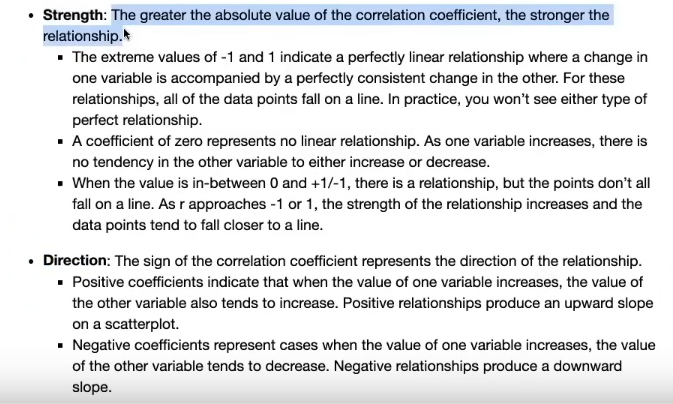

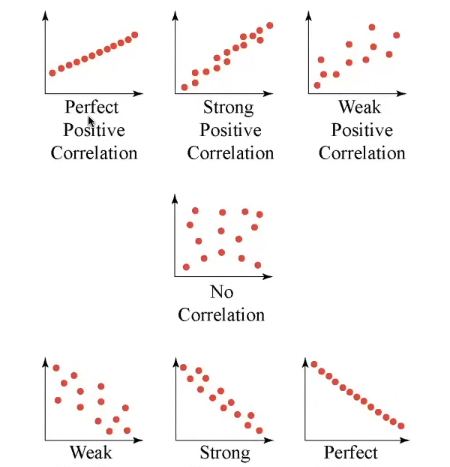

In [ ]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Map')

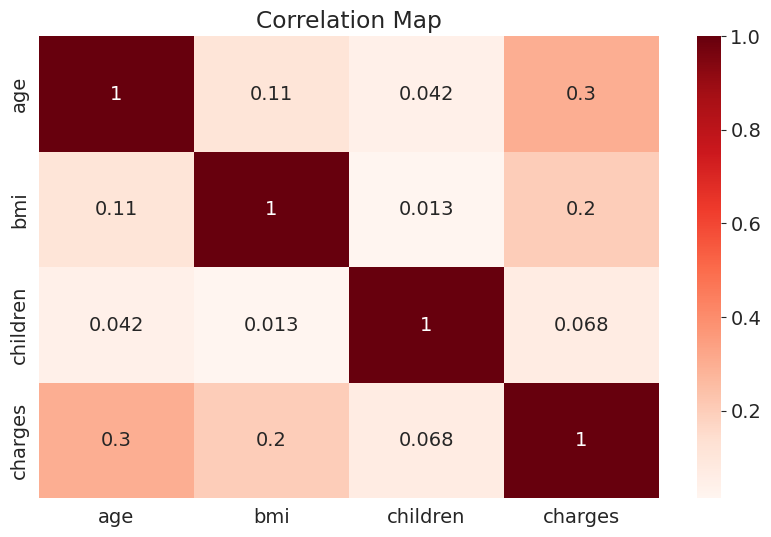

In [ ]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Map')

Linear Regression using a single feature.

Smoker and age columns have the strongest correlation with charges. We need to find a way of estimating the value of 'charges' using the value of age for non-smokers. First, let's create a data frame containing just data for non smokers

In [ ]:
non_smoker_df = medical_df[medical_df.smoker=='no']

Visualization of relationship b/w 'age' and 'charges'

<Axes: title={'center': 'Age v/s Charges'}, xlabel='age', ylabel='charges'>

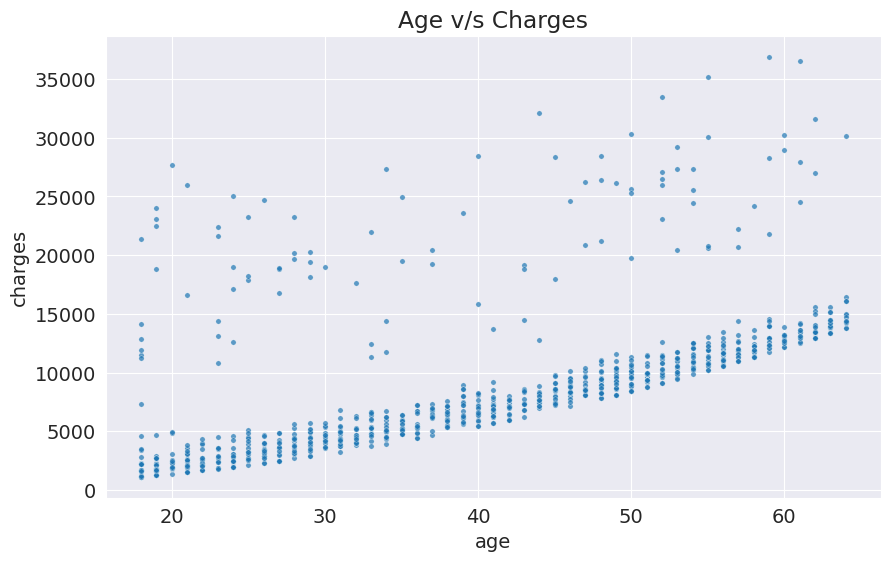

In [ ]:
plt.title('Age v/s Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

y = wx+b

=> charges = w x age + b

w -> weight
b -> bias

This technique is called linear regression

Values in the 'age' column are called as "inputs" and the values in the 'charges' column are called as "targets"


We are creating a helper function to compute charges

In [ ]:
def estimate_charges(age,w,b):
  return w*age+b

In [ ]:
w=280
b=-3500

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

,age
1,1540
2,4340
3,5740
4,5460
5,5180
...,...
1332,11060
1333,10500
1334,1540
1335,1540


In [ ]:
non_smoker_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


Text(0, 0.5, 'Estimated Charges')

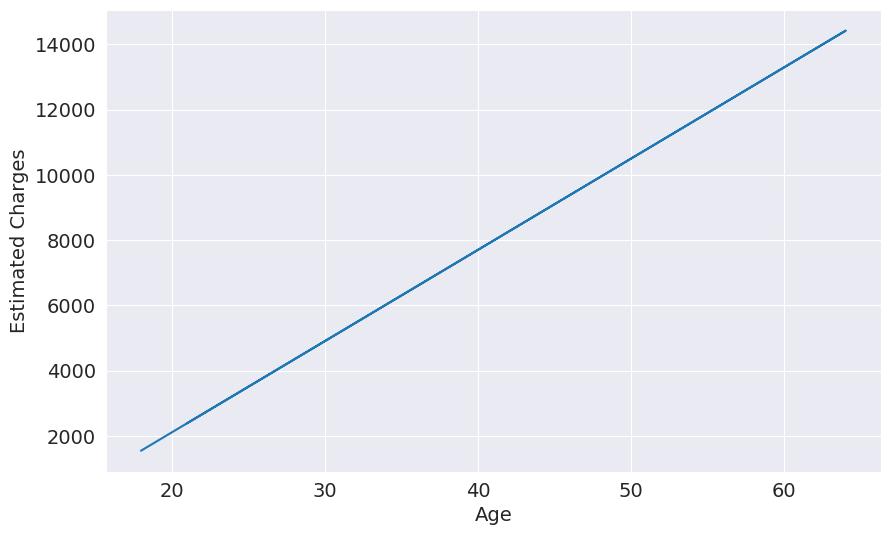

In [ ]:
plt.plot(ages,estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

This is not close to the actual data

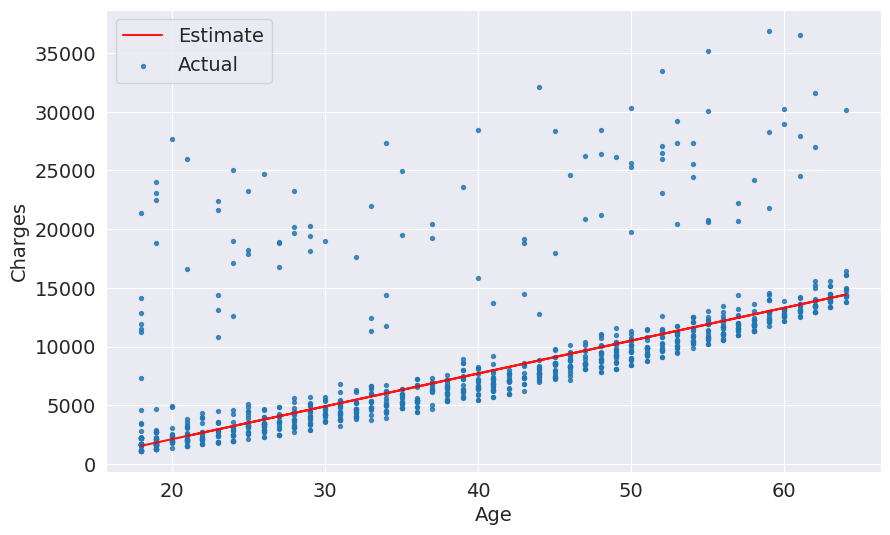

In [ ]:
target = non_smoker_df.charges

plt.plot(ages,estimated_charges,'r', alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

This shows poor estimates. We can try different values for w and b to for that we can use a helper function

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r', alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])

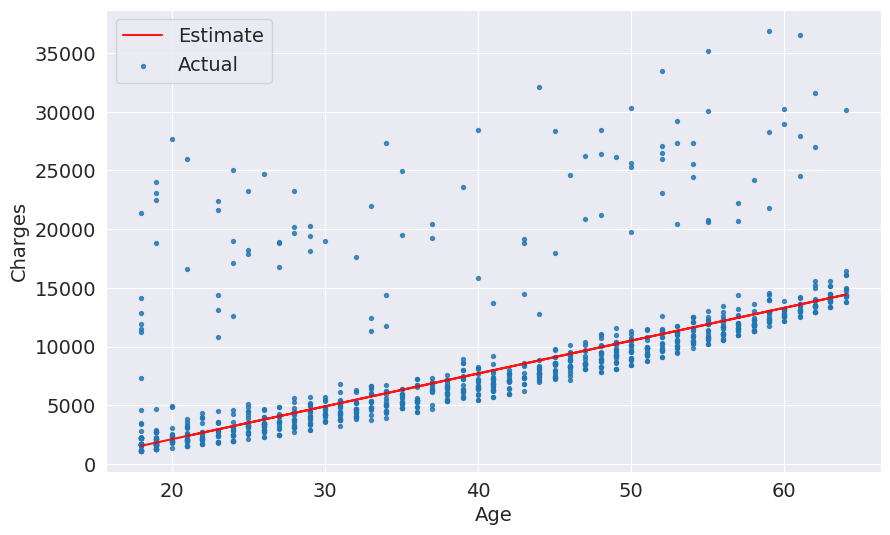

In [ ]:
try_parameters(280,-3500)

Instead of testing on our own with different values, we can instead use the computer to try different values for w and b and learn the relationship between "age" and "charges".

To do this, we need to:

1) Measure numerically how well the line fits the points.
2) Once the "measure of fit" has been computed, we need a way to modify w and b to improve the fit.

In [ ]:
targets = non_smoker_df.charges
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [ ]:
predictions = estimated_charges
predictions

,age
1,1540
2,4340
3,5740
4,5460
5,5180
...,...
1332,11060
1333,10500
1334,1540
1335,1540


In [ ]:
import numpy as np

In [ ]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [ ]:
w=50
b=100

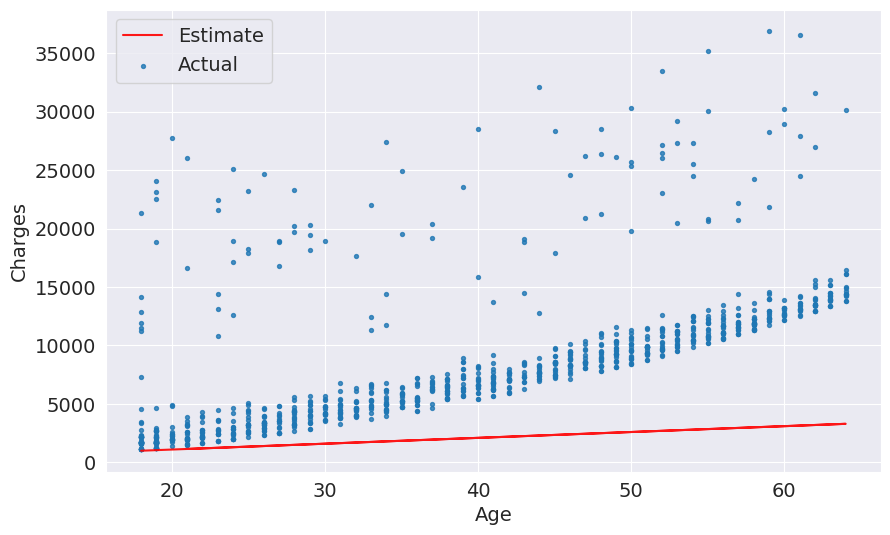

In [ ]:
try_parameters(w,b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)

In [ ]:
rmse(targets,predicted)

np.float64(8461.949562575493)

On average, each element in the prediction differs from the actual target by $8461

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r', alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])
  loss = rmse(target,predictions)
  print("RMSE Loss: ",loss)

RMSE Loss:  4701.510915290316


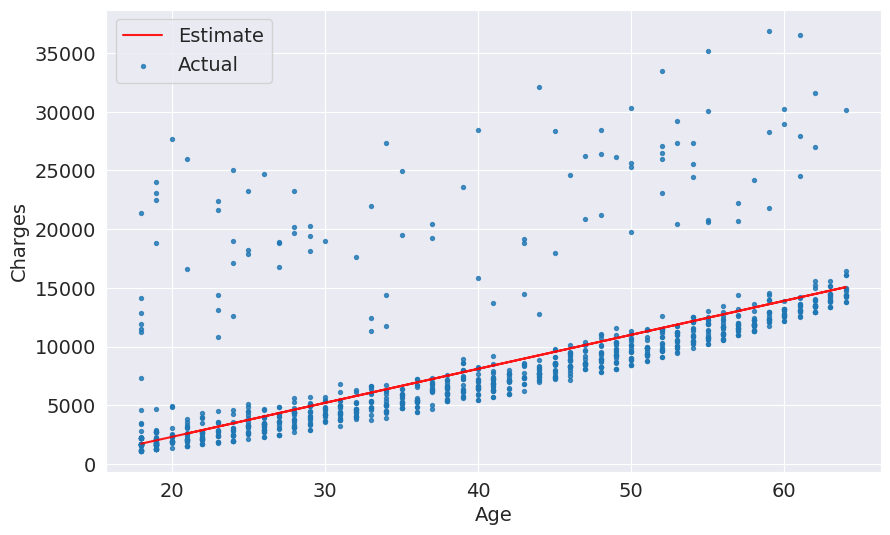

In [ ]:
try_parameters(290,-3500)

In [ ]:
!pip install scikit-learn --quiet

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print(inputs)
print(targets)
print('inputs.shape: ', inputs.shape)
print('targets.shape: ',targets.shape)

      age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns]
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64
inputs.shape:  (1064, 1)
targets.shape:  (1064,)


In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
X_new = pd.DataFrame([[23], [37], [61]], columns=["age"])
preds = model.predict(X_new)
preds

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
rmse(targets,predictions)

np.float64(4662.505766636395)

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

LinearRegression uses ordinary least square method while stochastic is used by SGDRegressor

RMSE Loss:  4662.505766636395


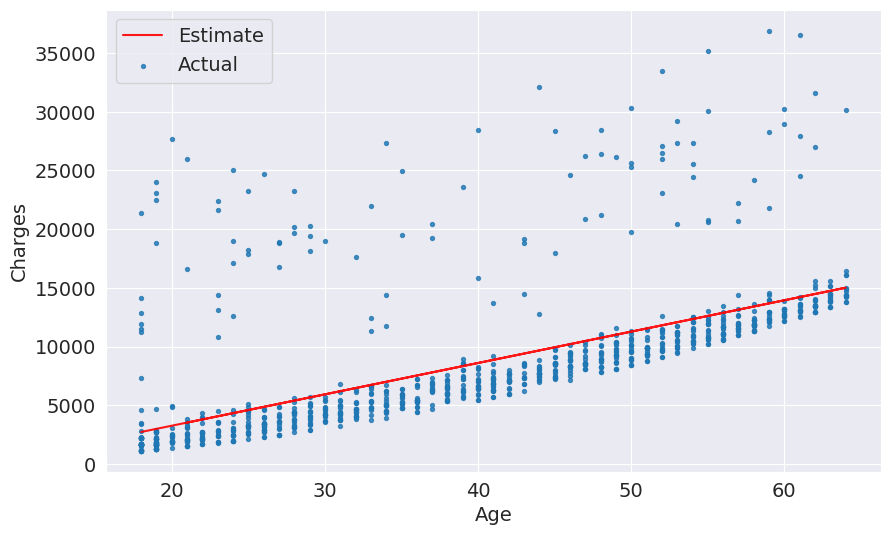

In [ ]:
#best line possible
try_parameters(model.coef_,model.intercept_)

# **Linear Regression using multiple features**

y = w1 x x1 + w2 x x2 + w3 x x3 + b

In [ ]:
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(target,predictions)

print('Loss: ',loss)

Loss:  4662.3128354612945


In [ ]:
predictions

array([2749.08516308, 5412.40282772, 6673.94368635, ..., 2735.99553127,
       2770.87763119, 3493.32334862])

using BMI doesn't reduce the loss by much as it has a week correlation with charges

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.0840365431283327)

In [ ]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

# Using only BMI



In [ ]:
inputs, targets = non_smoker_df[['bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(target,predictions)

print('Loss: ',loss)

Loss:  5969.772531913293


RMSE Loss:  5382.399588522189


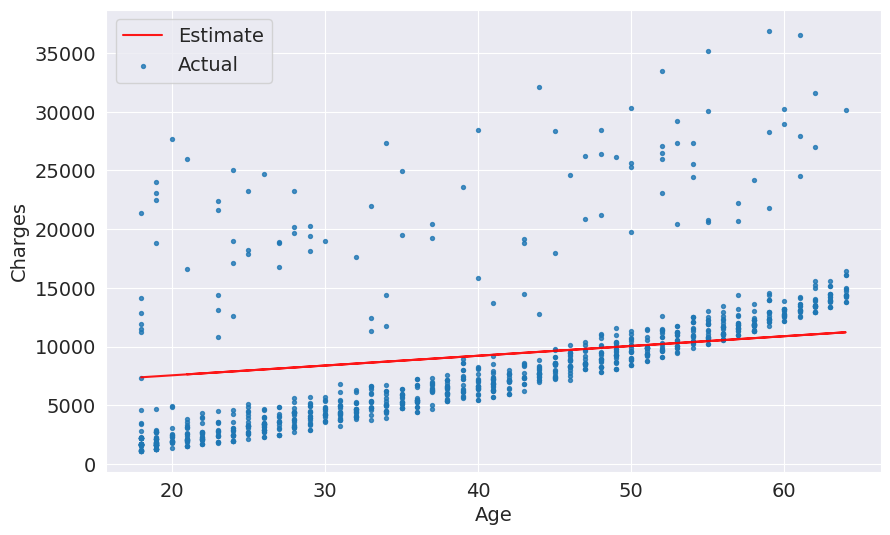

In [ ]:
try_parameters(model.coef_,model.intercept_)

# Worse

In [ ]:
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print('Loss: ',loss)

Loss:  11355.317901125973


In [ ]:
model.coef_,model.intercept_

(array([239.99447429, 332.0833645 , 542.86465225]),
 np.float64(-6916.243347787033))

In [ ]:
px.scatter(medical_df,x='age',y='charges',color='smoker')

#Using categorical features for machine learning

we can replace the values with 0 and 1

if more than 2 categories, we can perform one-hot encoding i.e create a new column for each category with 1s and 0s

if the categories have natural order e.g cold, neutral, warm, hot then, they can be converted to numbers 1,2,3,4 preserving the order. These are called ordinals

#Binary Categories


<Axes: xlabel='smoker', ylabel='charges'>

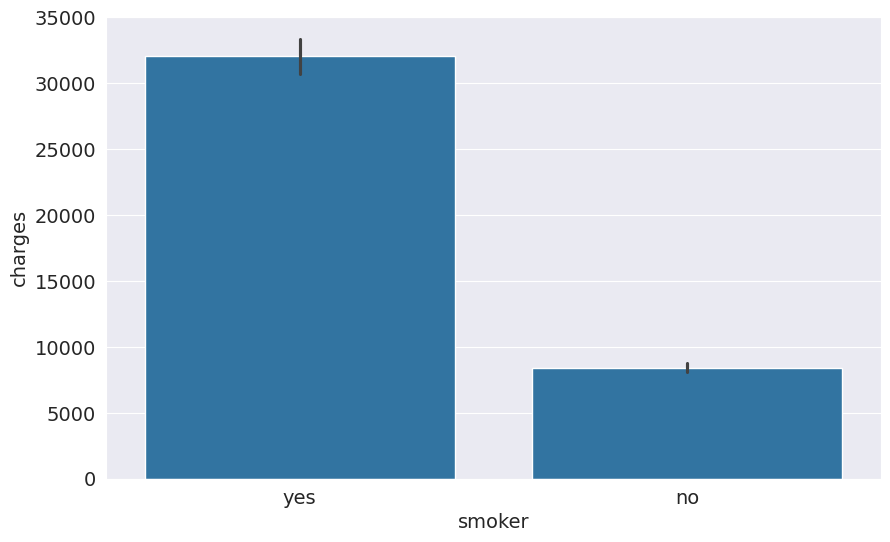

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [ ]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print('Loss: ',loss)

Loss:  6056.439217188081


In [ ]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [ ]:
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code']], medical_df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print('Loss: ',loss)

Loss:  6056.100708754546


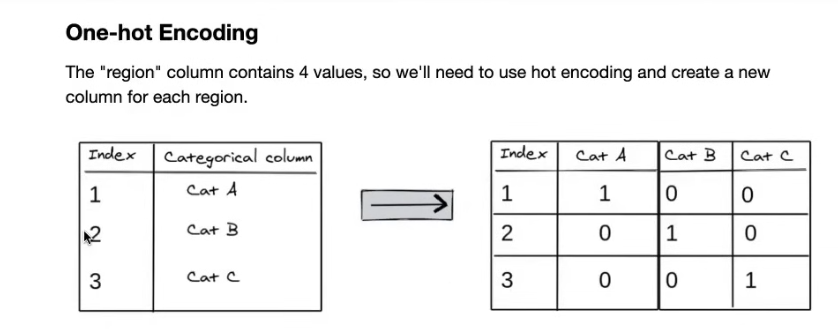

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast'],
               ['northwest']]).toarray()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


#Including region into linear regression model now

charges = w1 x age + w2 x bmi + w3 x charges + w4 x smoker + w5 x sex + w6 x region + b

In [ ]:
input_cols = ['age','bmi','children', 'smoker_code', 'sex_code','northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print('Loss: ',loss)

Loss:  6041.6796511744515


# Are two separate linear regression models, one for smokers and the other for non smokers better than a single linear regression model?

# Model Improvements

# Feature Scaling

we need to explain the rationale behind the predictions of out model

In [ ]:
 model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

np.float64(-12525.547811195444)

In [ ]:
weights_df = pd.DataFrame({
    'feature' : np.append(input_cols,1),
    'weight' : np.append(model.coef_,model.intercept_)
})

weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


# weights don't exactly represent which feature is more important

different features have different ranges


for this reason, standardization is applied

z = (x-mean)/standard_deviation


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

values b/w -1 and 1

In [ ]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data),axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs,targets)

predictions = model.predict(inputs)

loss = rmse(targets,predictions)

print('Loss: ',loss)

Loss:  6041.6796511744515


In [ ]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols,1),
    'weight' : np.append(model.coef_, model.intercept_)
})

weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


now we can see which features are most important

#Create a Test set



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets,test_size=0.1)

In [ ]:
model = LinearRegression().fit(inputs_train,targets_train)

predictions_test = model.predict(inputs_test)

loss = rmse(targets_test, predictions_test)
print('Test Loss: ',loss)

Test Loss:  5928.234361784277


In [ ]:
predictions_train = model.predict(inputs_train)

loss = rmse(targets_train, predictions_train)

print('Training Loss: ',loss)

Training Loss:  6054.790617455373
